In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\rku68\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
social=pd.read_csv(r"C:\Users\rku68\OneDrive\Desktop\csv\socialn.csv")

In [3]:
social.head(3)

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0


In [4]:
social.isnull().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [5]:
x=social.iloc[:,:-1]
y=social['Purchased']

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
ss=StandardScaler()

In [8]:
ss.fit(x)

StandardScaler()

In [9]:
x= pd.DataFrame(ss.transform(x),columns=x.columns)

In [11]:
x

,Age,EstimatedSalary
0,-1.781797,-1.490046
1,-0.253587,-1.460681
2,-1.113206,-0.785290
3,-1.017692,-0.374182
4,-1.781797,0.183751
...,...,...
395,0.797057,-0.844019
396,1.274623,-1.372587
397,1.179110,-1.460681
398,-0.158074,-1.078938


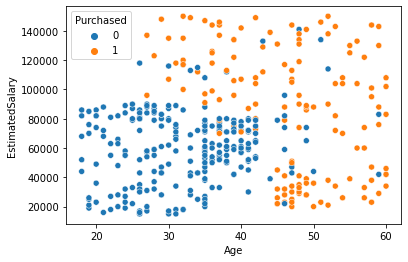

In [12]:
sns.scatterplot(x='Age',y='EstimatedSalary',data=social,hue='Purchased')
plt.show()

In [14]:
from mlxtend.plotting import plot_decision_regions

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [17]:
x_train.shape

(320, 2)

In [18]:
from sklearn.tree import DecisionTreeClassifier

# Pre-Pruning

In [19]:
dt=DecisionTreeClassifier(max_depth=3)

In [20]:
dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [21]:
dt1=DecisionTreeClassifier(criterion='entropy')

In [22]:
dt1.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [23]:
dt.score(x_test,y_test)*100

91.25

In [24]:
dt.score(x_train,y_train)*100

91.875

In [25]:
dt1.score(x_test,y_test)*100

83.75

In [26]:
dt.predict([[35,20000]])

C:\Users\rku68\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

C:\Users\rku68\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


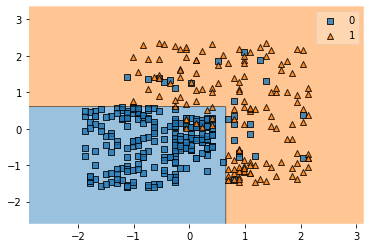

In [27]:
plot_decision_regions(x.to_numpy(),y.to_numpy(),clf=dt)
plt.show()

C:\Users\rku68\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


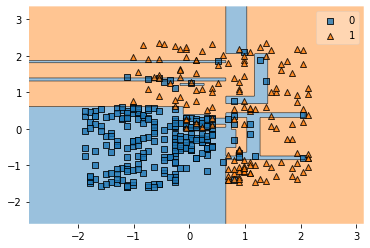

In [28]:
plot_decision_regions(x.to_numpy(),y.to_numpy(),clf=dt1)
plt.show()

In [29]:
from sklearn.tree import plot_tree

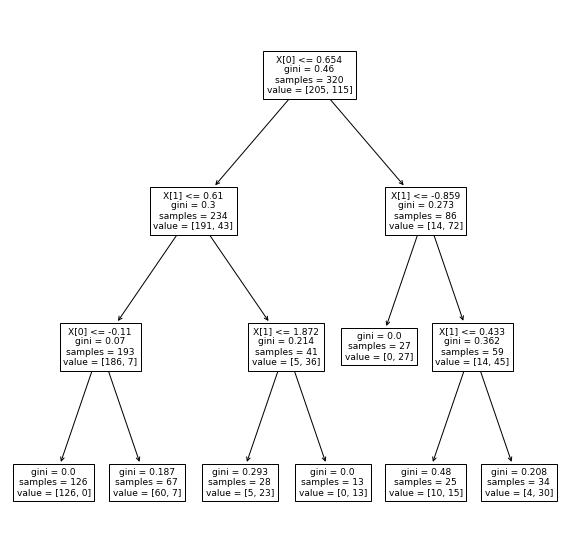

In [30]:
plt.figure(figsize=(10,10))
plot_tree(dt)
plt.show()

# post_pruning

In [31]:
for i in range(1,20):
    dt2=DecisionTreeClassifier(max_depth=i)
    dt2.fit(x_train,y_train)
    print(dt2.score(x_train,y_train),dt2.score(x_test,y_test),i)

0.821875 0.9 1
0.91875 0.9125 2
0.91875 0.9125 3
0.93125 0.9125 4
0.934375 0.9 5
0.95 0.8625 6
0.96875 0.85 7
0.971875 0.85 8
0.98125 0.85 9
0.984375 0.85 10
0.990625 0.8375 11
0.99375 0.8375 12
0.99375 0.8375 13
0.996875 0.8375 14
0.996875 0.8375 15
0.996875 0.8375 16
0.996875 0.8375 17
0.996875 0.8375 18
0.996875 0.8375 19
